## Ensemble이란 무엇인가?

이제 본격적으로 통계역학(statistical mechanics)에 대한 수업이 진행되었습니다.

많은 내용이 오고 갔지만, 학생분들이 가장 이해하기 어려운 부분이 Ensemble의 개념이 아닐까 싶어, 이에 대한 보충 설명을 준비해봤습니다.

우선 Ensemble의 정의는 다음과 같습니다.

> A Collection of "macroscopically identical" but "microscopically different" system copies

여기에서 macroscopically identical이라는 것은, particle의 개수 N, system이 차지하는 부피 V, system의 온도 T 등과 같이 macroscopic하게 관측되는 양이 같다는 것을 의미합니다.

하지만 macroscopically하게 identical한 system이 정말 유일할까요?

예시를 들어 설명을 해보도록 하겠습니다.

![Alt text](./arrangement%20of%20things_2.jpg)

위의 그림을 보시면, 서랍을 정리하기 전과 후가 극명하게 다르다는 것을 볼 수 있습니다.

서랍을 정리하기 전과 후에 서랍안에 들어있던 물건의 개수와 종류는 변하지 않았다고 가정해봅시다.

하지만 정리 전과 후에 서랍의 상태는 전혀 다르다고 볼 수 있습니다.

Tea & Coffee, Snacks, Sweets ... 안에 들어있던 물건들의 위치가 종류별로 잘 정돈된 것이 보이죠?

안에 들어있는 물건이 변한 것도 아닌데(macroscopically identical), 두 상태는 다릅니다.(microscopically different system)

Ensemble도 위와 같이 생각할 수 있습니다.

거시적인 관점에서 관측되는 양이 같아도 미시적인 세계에서 보면 다른 system을 구성할 수 있습니다.

위의 설명은 엄밀하게 따지면 오류가 있지만, Ensemble의 concept를 설명하는데 좋은 예시라고 볼 수 있습니다.

## Stirling Approximation

통계역학에서 자주 보실 이 근사는 다음과 같이 쓰입니다.

$$\ln(N!) \cong N\ln(N) - N \text{  (for large $N$)}$$

이렇게 근사가 되는 것은 [**wikipedia**](https://en.wikipedia.org/wiki/Stirling%27s_approximation)에 derivation이 자세하게 나와있습니다.

궁금하신 분들은 참고하시길 바랍니다.

저는 간단한 python code를 통해 얼마나 큰 $N$에서 이 stirling approximation이 같은지를 보여드리도록 하겠습니다.

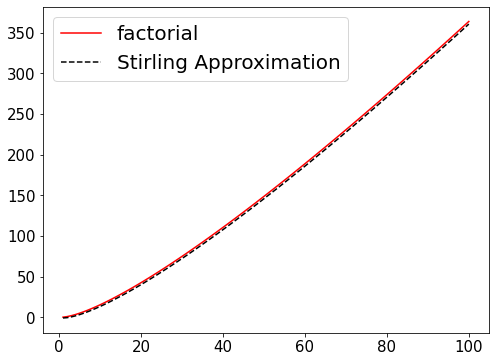

In [72]:
# 1. 사용할 라이브러리를 불러오기

import numpy as np
import matplotlib.pyplot as plt 
# scipy는 과학 기술 계산을 위한 python 라이브러리입니다. 이 라이브러리에서 정의된 factorial 함수를 사용했습니다. 
from scipy.special import factorial 

# 2. 함수 정의하기
def stirling(n):
    return n * np.log(n) - n

# 3. 보고 싶은 N의 최대값을 설정, N에 대한 array를 생성
N_max = 100
N_array = np.arange(1, N_max + 1, dtype = int)


# 결과 값 도출하기
log_factorial_result = np.zeros(N_max)
log_stirling_result = np.zeros(N_max)

for i in range(N_max):
    log_factorial_result[i] = np.log(factorial(N_array[i]))
    log_stirling_result[i] = stirling(N_array[i])

# 결과를 확인해보기
plt.figure(figsize = (8,6))
plt.plot(N_array, log_factorial_result, 'r-', label = "factorial")
plt.plot(N_array, log_stirling_result, 'k--', label = "Stirling Approximation")

plt.legend(fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

factorial의 결과와 stirling approximation의 결과가 모든 구간에서 일치하는 것 처럼 보입니다.

하지만 실제로는 어느정도 차이가 납니다. 특히 작은 N값에 대하여 크기가 도드라지게 다릅니다.

지금은 이러한 차이를 보기에 y축이 알맞지 않습니다.(말하자면 1mm의 차이를 보는데 1m 단위의 자를 쓰고 있는 상황인거죠.) 

그렇다면 이러한 차이를 어떻게 볼 수 있을까요?

1. 첫번째로 x축과 y축의 범위를 잘 설정해서 보는 방법이 있습니다.

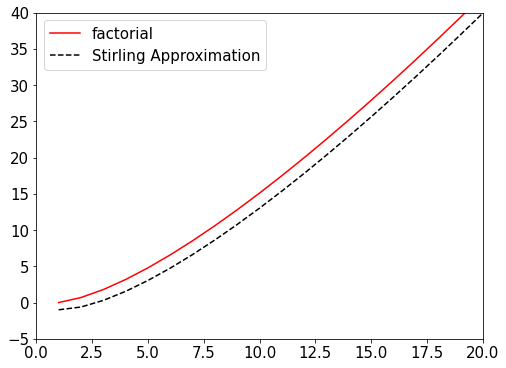

In [70]:
# 결과를 확인해보기
plt.figure(figsize = (8,6))
plt.plot(N_array, log_factorial_result, 'r-', label = "factorial")
plt.plot(N_array, log_stirling_result, 'k--', label = "Stirling Approximation")

#추가된 내용(x축 y축 범위 설정)
plt.xlim(0,20)
plt.ylim(-5,40)

plt.legend(fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

2. 두번째로, log - log 그래프를 그려 확인하는 방법이 있습니다.

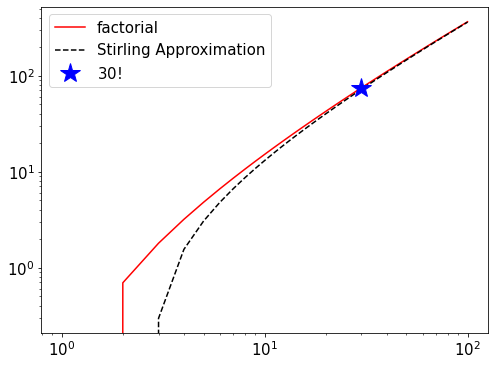

In [68]:
# 결과를 확인해보기
plt.figure(figsize = (8,6))
# log-log graph 그리기
plt.loglog(N_array, log_factorial_result, 'r-', label = "factorial")
plt.loglog(N_array, log_stirling_result, 'k--', label = "Stirling Approximation")
plt.loglog([30],np.log([factorial(30)]),'b*', markersize = 20, label = "$30!$")

plt.legend(fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

위의 결과를 봤을 때, $N \geq 30$ 부터는 factorial의 결과와, stirling의 결과가 거의 일치한다는 사실을 확인할 수 있습니다.